In [59]:
import pandas as pd
from sklearn.utils import Bunch
import matplotlib.pyplot as plt
import numpy as np

In [60]:
df = pd.read_csv("final_dataset1/processed_dataset1.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,Time,Recorded_times,Categorized_times,Categorized_trasaction_purpose,Birth Year,Categorized DOB,Categorized Gender
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.986391,-81.200714,0,2020-06-21 12:14:25,12:14:25,3,3,1968,3,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,39.450498,-109.960431,0,2020-06-21 12:14:33,12:14:33,3,3,1990,4,1
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.495810,-74.196111,0,2020-06-21 12:14:53,12:14:53,3,3,1970,3,1
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.812398,-80.883061,0,2020-06-21 12:15:15,12:15:15,3,4,1987,4,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.959148,-85.884734,0,2020-06-21 12:15:17,12:15:17,3,2,1955,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,39.946837,-91.333331,0,2020-12-31 23:59:07,23:59:07,4,3,1966,3,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.661049,-96.186633,0,2020-12-31 23:59:09,23:59:09,4,1,1999,5,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.658340,-119.715054,0,2020-12-31 23:59:15,23:59:15,4,1,1981,4,1
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.470525,-117.080888,0,2020-12-31 23:59:24,23:59:24,4,2,1965,3,0


In [61]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Time', 'Recorded_times',
       'Categorized_times', 'Categorized_trasaction_purpose', 'Birth Year',
       'Categorized DOB', 'Categorized Gender'],
      dtype='object')

In [62]:
data = Bunch(dat=[], target=[], feature_names=[], target_names=[])

In [63]:
def create_bunch():
    data.feature_names.append('dob')
    data.feature_names.append('gender')
    data.feature_names.append('amt')
    data.feature_names.append('zip')
    data.feature_names.append('lat')
    data.feature_names.append('long')
    data.feature_names.append('city_pop')
    data.feature_names.append('merch_lat')
    data.feature_names.append('merch_long')
    data.target_names.append('fraud') 
    data.target_names.append('not fraud') 
    
    for i in range(df.shape[0]):
        key = []
        key.append(df.iloc[i]['Categorized DOB'])
        key.append(df.iloc[i]['Categorized Gender'])
        key.append(df.iloc[i]['amt'])
        key.append(df.iloc[i]['zip'])
        key.append(df.iloc[i]['lat'])
        key.append(df.iloc[i]['long'])
        key.append(df.iloc[i]['city_pop'])
        key.append(df.iloc[i]['merch_lat'])
        key.append(df.iloc[i]['merch_long'])
        
        data.dat.append(key)
        #data.dat = np.append(data.dat, [key])
        data.target.append(1 if df.iloc[i]['is_fraud'] else 0)

In [64]:
create_bunch() # this takes a very long time...

In [65]:
data.dat = np.array(data.dat)

In [66]:
data.dat

array([[ 3.00000000e+00,  0.00000000e+00,  2.86000000e+00, ...,
         3.33497000e+05,  3.39863910e+01, -8.12007140e+01],
       [ 4.00000000e+00,  1.00000000e+00,  2.98400000e+01, ...,
         3.02000000e+02,  3.94504980e+01, -1.09960431e+02],
       [ 3.00000000e+00,  1.00000000e+00,  4.12800000e+01, ...,
         3.44960000e+04,  4.04958100e+01, -7.41961110e+01],
       ...,
       [ 4.00000000e+00,  1.00000000e+00,  8.68800000e+01, ...,
         3.68400000e+03,  4.66583400e+01, -1.19715054e+02],
       [ 3.00000000e+00,  0.00000000e+00,  7.99000000e+00, ...,
         1.29000000e+02,  4.44705250e+01, -1.17080888e+02],
       [ 4.00000000e+00,  0.00000000e+00,  3.81300000e+01, ...,
         1.16001000e+05,  3.62100970e+01, -9.70363720e+01]])

In [67]:
data.feature_names

['dob',
 'gender',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long']

In [68]:
data.target_names

['fraud', 'not fraud']

In [69]:
data.target = np.reshape(data.target, (1,-1))[0]
print(data.target)
data.target_names = np.reshape(data.target_names, (1,-1))[0]
print(data.target_names)

[0 0 0 ... 0 0 0]
['fraud' 'not fraud']


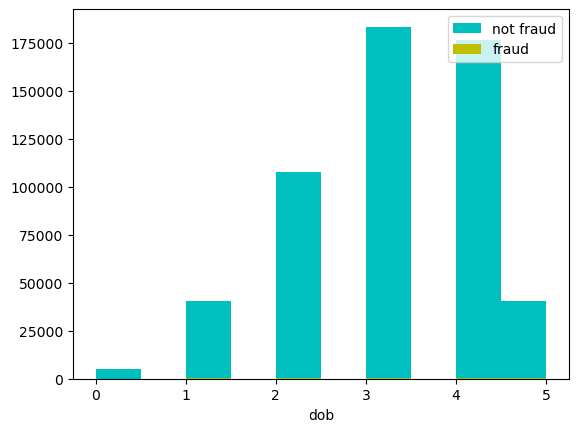

In [70]:
#Histograms of dob
#['dob', 'gender']

fig, ax = plt.subplots()
x_index = 0
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

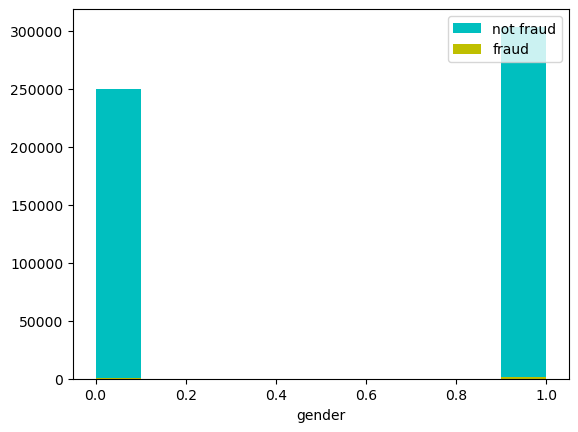

In [71]:
#Histograms of gender
#['dob', 'gender']

fig, ax = plt.subplots()
x_index = 1
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

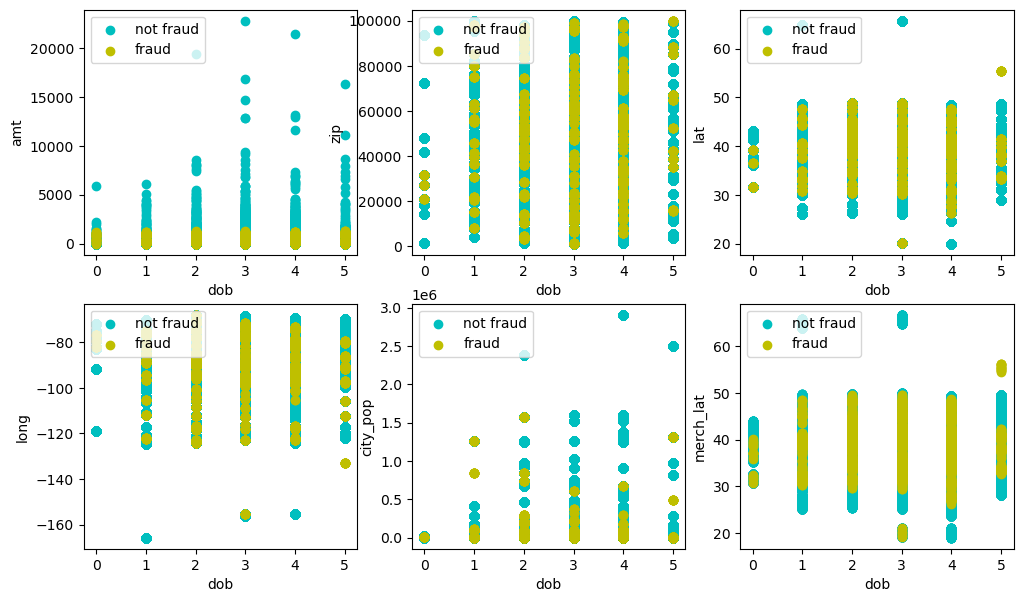

In [72]:
# Scatterplots
#['dob', 'gender']

#create six subplots using axs is a 2D NumPy array  
fig, axs = plt.subplots(2, 3, figsize=(12,7))

colors = ['c', 'y']

rows=[0,1]
cols=[0,1,2]

# create feature pairs for scatterplots
xy_pairs=[[0, 2],[0, 3],[0, 4],[0, 5],[0, 6],[0, 7]]
xy_index=0

for i in rows:
    for j in cols: 
        
        x_index = xy_pairs[xy_index][0]
        y_index = xy_pairs[xy_index][1]
        
        xy_index+=1

        for label, color in zip(range(len(data.target_names)), colors):
            axs[i,j].scatter(data.dat[data.target==label, x_index], 
                        data.dat[data.target==label, y_index],
                        label=data.target_names[1-label],
                        c=color)

        axs[i,j].set_xlabel(data.feature_names[x_index])
        axs[i,j].set_ylabel(data.feature_names[y_index])
        axs[i,j].legend(loc='upper left')


plt.subplots_adjust(wspace=0.2, hspace=0.2) #format subplots 
plt.show()

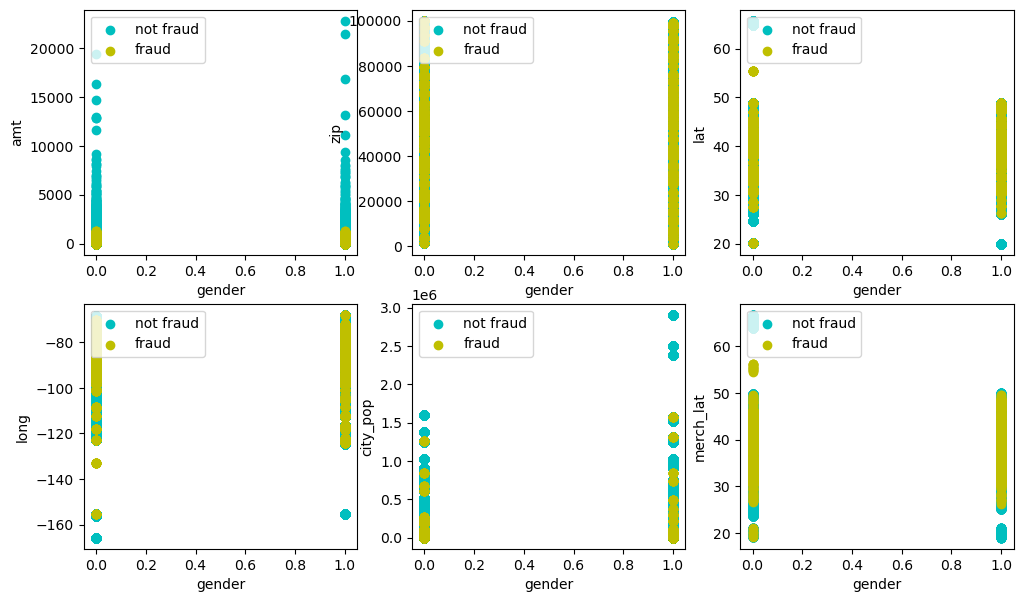

In [73]:
# Scatterplots
#['dob', 'gender']

#create six subplots using axs is a 2D NumPy array  
fig, axs = plt.subplots(2, 3, figsize=(12,7))

colors = ['c', 'y']

rows=[0,1]
cols=[0,1,2]

# create feature pairs for scatterplots
xy_pairs=[[1, 2],[1, 3],[1, 4],[1, 5],[1, 6],[1, 7]]
xy_index=0

for i in rows:
    for j in cols: 
        
        x_index = xy_pairs[xy_index][0]
        y_index = xy_pairs[xy_index][1]
        
        xy_index+=1

        for label, color in zip(range(len(data.target_names)), colors):
            axs[i,j].scatter(data.dat[data.target==label, x_index], 
                        data.dat[data.target==label, y_index],
                        label=data.target_names[1-label],
                        c=color)

        axs[i,j].set_xlabel(data.feature_names[x_index])
        axs[i,j].set_ylabel(data.feature_names[y_index])
        axs[i,j].legend(loc='upper left')


plt.subplots_adjust(wspace=0.2, hspace=0.2) #format subplots 
plt.show()